In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import (accuracy_score, roc_curve, auc, precision_score,
                            f1_score, recall_score)
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
import warnings
import time
warnings.filterwarnings('ignore')

In [2]:
clean_train = pd.read_csv('clean_train')
clean_test = pd.read_csv('test_dummy')

In [3]:
clean_train.head()

,Unnamed: 0,id,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,status_group,...,source_shallow well,source_spring,source_unknown,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
0,0,69572,6000.0,1390,34.938093,-9.856322,11,5,109,functional,...,0,1,0,0,1,0,0,0,0,0
1,1,8776,0.0,1399,34.698766,-2.147466,20,2,280,functional,...,0,0,0,0,1,0,0,0,0,0
2,2,34310,25.0,686,37.460664,-3.821329,21,4,250,functional,...,0,0,0,0,0,1,0,0,0,0
3,3,67743,0.0,263,38.486161,-11.155298,90,63,58,non functional,...,0,0,0,0,0,1,0,0,0,0
4,4,19728,0.0,0,31.130847,-1.825359,18,1,0,functional,...,0,0,0,0,1,0,0,0,0,0


In [4]:
clean_test.head()

,Unnamed: 0,id,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,basin_Internal,...,source_shallow well,source_spring,source_unknown,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
0,0,50785,0.0,1996,35.290799,-4.059696,21,3,321,1,...,0,0,0,0,0,0,0,0,0,1
1,1,51630,0.0,1569,36.656709,-3.309214,2,2,300,0,...,0,1,0,0,1,0,0,0,0,0
2,2,17168,0.0,1567,34.767863,-5.004344,13,2,500,1,...,0,0,0,0,0,0,0,0,0,1
3,3,45559,0.0,267,38.058046,-9.418672,80,43,250,0,...,1,0,0,0,0,0,0,0,0,1
4,4,49871,500.0,1260,35.006123,-10.950412,10,3,60,0,...,0,1,0,0,1,0,0,0,0,0


# Decision Tree

In [5]:
X = clean_train.drop(columns = ['id', 'status_group'])
y = clean_train['status_group']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = .20)

In [7]:
print('training:', X_train.shape, y_train.shape)
print('test:', X_test.shape, y_test.shape)

training: (46070, 98) (46070,)
test: (11518, 98) (11518,)


In [8]:
classifier = DecisionTreeClassifier(random_state = 10)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [9]:
y_pred = classifier.predict(X_test)

In [10]:
# checking accuracy

In [11]:
acc = accuracy_score(y_test, y_pred) * 100
print('accuracy :{0}'.format(acc))

accuracy :72.96405625976732


In [12]:
# classification report

In [13]:
print('Classification Report: Decision Tree {0}'.format(acc))
print(classification_report(y_test, classifier.predict(X_test)))

Classification Report: Decision Tree 72.96405625976732
                         precision    recall  f1-score   support

             functional       0.78      0.78      0.78      6236
functional needs repair       0.32      0.32      0.32       799
         non functional       0.74      0.74      0.74      4483

               accuracy                           0.73     11518
              macro avg       0.61      0.61      0.61     11518
           weighted avg       0.73      0.73      0.73     11518



<Figure size 864x720 with 0 Axes>

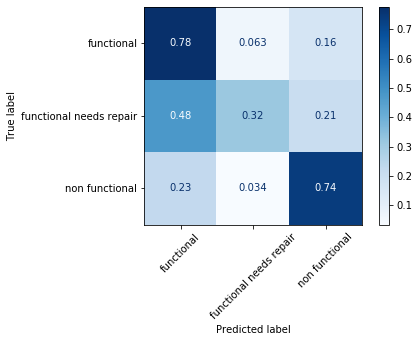

<Figure size 432x288 with 0 Axes>

In [14]:


# confusion matrix
plt.figure(figsize = (12, 10))
plot_confusion_matrix(classifier, X_test, y_test, cmap = 'Blues', normalize = 'true')
plt.xticks(rotation = 45)
plt.show()
#plt.savefig('confusion_matrix2.png')



In [14]:
# plot decision tree

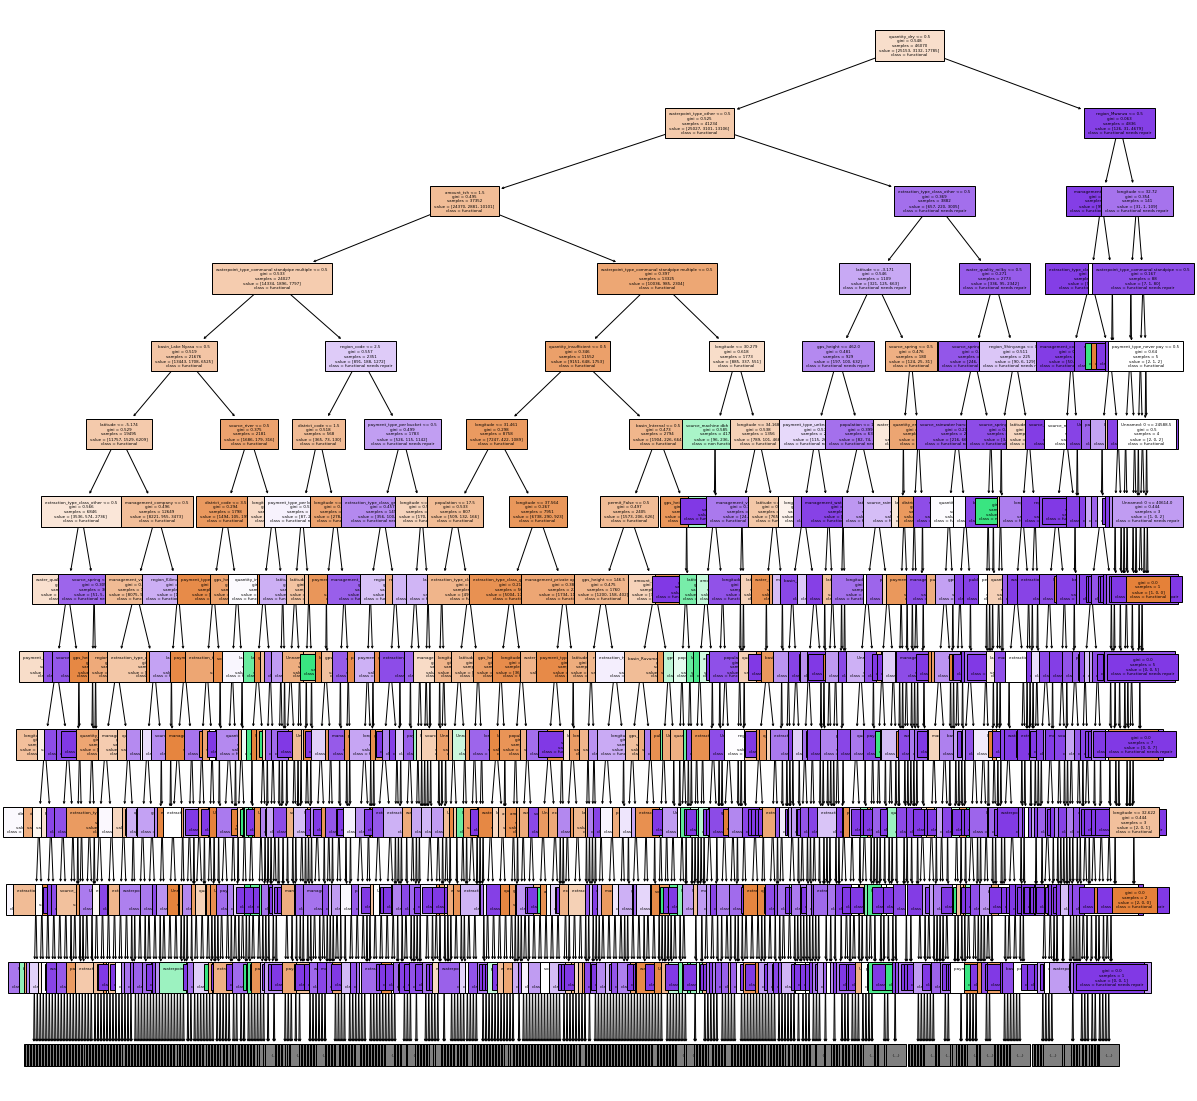

In [15]:
fig = plt.figure(figsize = (20,20))
_ = tree.plot_tree(classifier, feature_names = X.columns, 
                           class_names = y.unique(),
                           filled = True, max_depth = 12, 
                           fontsize = 4
                          )

In [16]:
# 

In [17]:
# GridSearchCV

In [18]:
dtree_param_grid = {
    'max_depth': [4, 6, 8, 10],
    'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
    'class_weight': ['balanced']
}

In [19]:
dtree_grid = GridSearchCV(estimator = DecisionTreeClassifier(),
                          param_grid = dtree_param_grid, scoring = 'accuracy')

In [20]:
dtree_grid.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8]},
             scoring='accuracy')

In [21]:
dtree_grid.best_params_

{'class_weight': 'balanced',
 'max_depth': 4,
 'min_samples_leaf': 7,
 'min_samples_split': 2}

Classifiaction Report: Decision Tree with GridSearch
                         precision    recall  f1-score   support

             functional       0.65      0.94      0.77      6236
functional needs repair       0.27      0.17      0.21       799
         non functional       0.91      0.40      0.56      4483

               accuracy                           0.68     11518
              macro avg       0.61      0.50      0.51     11518
           weighted avg       0.72      0.68      0.65     11518



<Figure size 864x720 with 0 Axes>

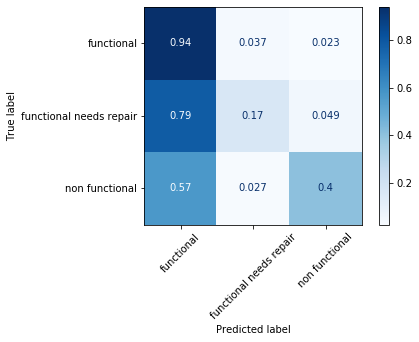

In [22]:
print('Classifiaction Report: Decision Tree with GridSearch')
print(classification_report(y_test, dtree_grid.predict(X_test)))

plt.figure(figsize = (12, 10))
plot_confusion_matrix(dtree_grid, X_test, y_test, cmap = 'Blues', normalize = 'true')
plt.xticks(rotation = 45)
plt.show()

In [23]:
type(dtree_grid.best_estimator_)

sklearn.tree._classes.DecisionTreeClassifier

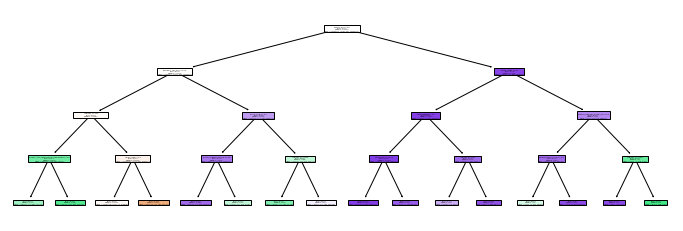

In [24]:
fig = plt.figure(figsize = (12, 4 ))
_ = plot_tree(dtree_grid.best_estimator_, 
              feature_names = X.columns, 
              filled = True)

In [25]:
print(classification_report(y_test, classifier.predict(X_test)))

                         precision    recall  f1-score   support

             functional       0.78      0.78      0.78      6236
functional needs repair       0.32      0.32      0.32       799
         non functional       0.74      0.74      0.74      4483

               accuracy                           0.73     11518
              macro avg       0.61      0.61      0.61     11518
           weighted avg       0.73      0.73      0.73     11518



In [26]:
# Tree with entropy

In [27]:
tree2 = DecisionTreeClassifier(random_state = 10, criterion = 'entropy')
tree2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=10)

In [28]:
tree2_pred = tree2.predict(X_test)

In [29]:
acc = accuracy_score(y_test, tree2_pred) * 100
print('accuracy :{0}'.format(acc))

accuracy :73.87567285987151


                         precision    recall  f1-score   support

             functional       0.79      0.78      0.78      6236
functional needs repair       0.35      0.36      0.35       799
         non functional       0.74      0.75      0.75      4483

               accuracy                           0.74     11518
              macro avg       0.63      0.63      0.63     11518
           weighted avg       0.74      0.74      0.74     11518



<Figure size 864x720 with 0 Axes>

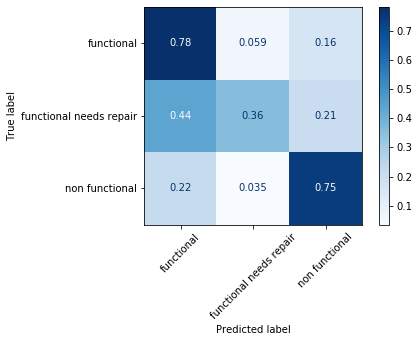

In [30]:
print(classification_report(y_test, tree2.predict(X_test)))

# confusion matrix
plt.figure(figsize = (12, 10))
plot_confusion_matrix(tree2, X_test, y_test, cmap = 'Blues', normalize = 'true')
plt.xticks(rotation = 45)
plt.show()

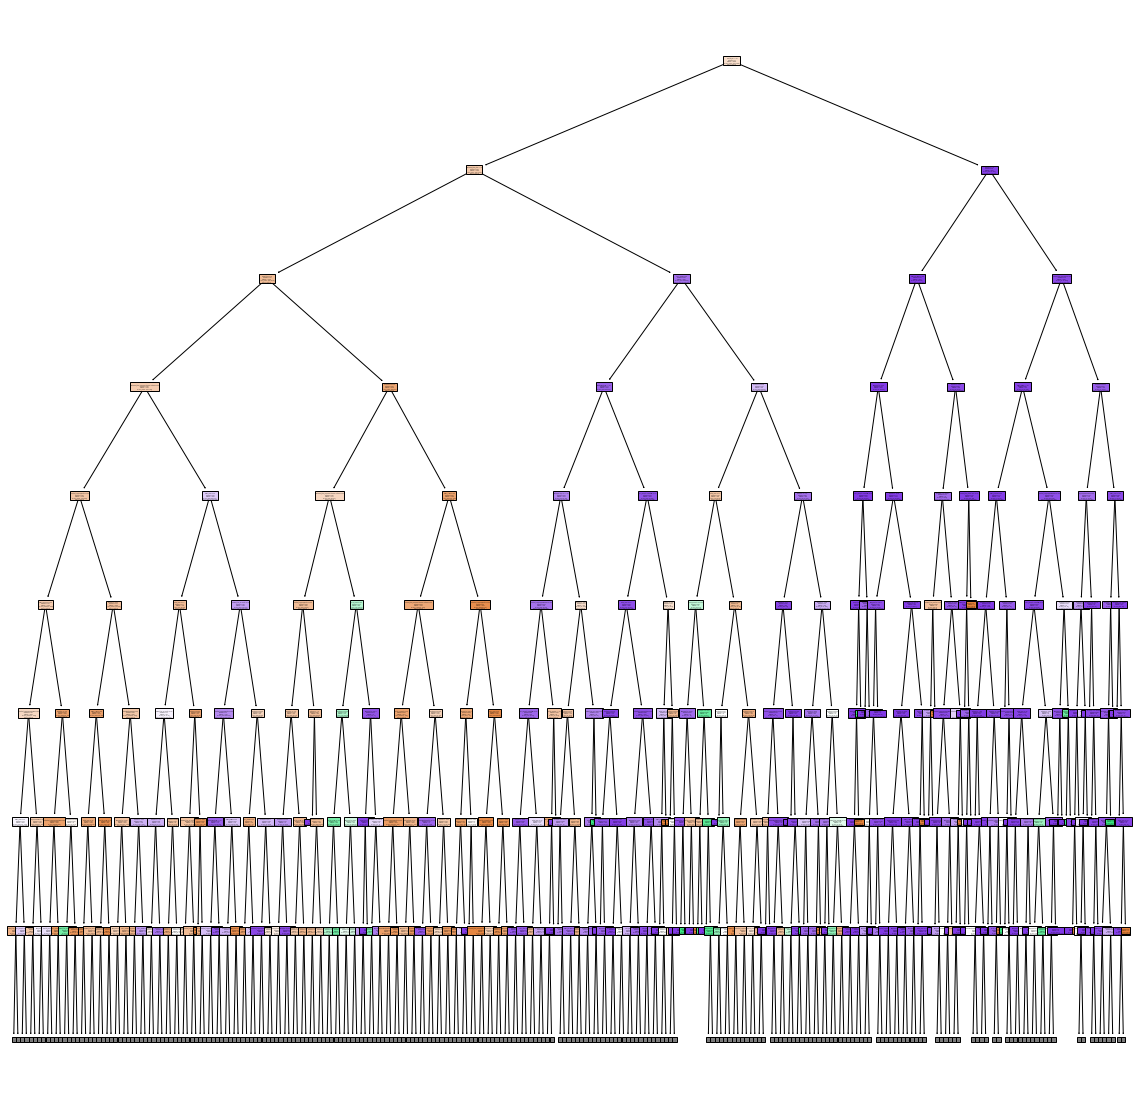

In [31]:
fig = plt.figure(figsize = (20,20))
_ = tree.plot_tree(tree2, feature_names = X.columns, 
                           class_names = y.unique(),
                           filled = True, max_depth = 8
                          )

In [32]:
# KNN


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 42)

In [34]:
# normalize with StandardScaler

In [35]:
scaler = StandardScaler()

In [36]:
scaled_train = scaler.fit_transform(X_train)
scaled_test = scaler.transform(X_test)

In [37]:
knnss = KNeighborsClassifier()

In [38]:
knnss.fit(scaled_train, y_train)
test_pred_knnss = knnss.predict(scaled_test)

In [40]:
print('train accuracy:', accuracy_score(y_train, knnss.predict(X_train)))
print('test accuracy:', accuracy_score(y_test, test_pred_knnss))

train accuracy: 0.5372910787931409
test accuracy: 0.7497829484285466


Classification Report: KNN with StanderScaler
                         precision    recall  f1-score   support

             functional       0.55      0.92      0.69      6301
functional needs repair       0.00      0.00      0.00       791
         non functional       0.42      0.09      0.15      4426

               accuracy                           0.54     11518
              macro avg       0.32      0.34      0.28     11518
           weighted avg       0.46      0.54      0.43     11518



<Figure size 864x720 with 0 Axes>

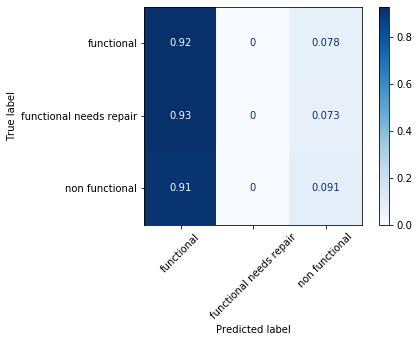

In [41]:
print('Classification Report: KNN with StanderScaler')
print(classification_report(y_test, knnss.predict(X_test)))

# confusion matrix
plt.figure(figsize = (12, 10))
plot_confusion_matrix(knnss, X_test, y_test, cmap = 'Blues', normalize = 'true')
plt.xticks(rotation = 45)
plt.show()

In [42]:
knn = KNeighborsClassifier()

In [43]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

Classification Report: KNN
                         precision    recall  f1-score   support

             functional       0.57      0.70      0.63      6301
functional needs repair       0.08      0.02      0.03       791
         non functional       0.45      0.37      0.40      4426

               accuracy                           0.52     11518
              macro avg       0.37      0.36      0.36     11518
           weighted avg       0.49      0.52      0.50     11518



<Figure size 864x720 with 0 Axes>

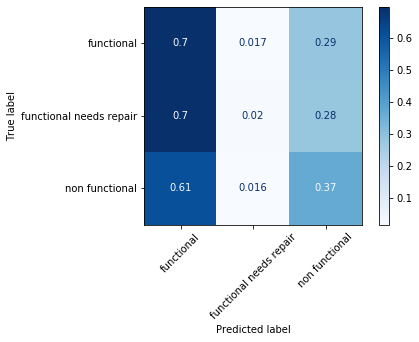

In [44]:
print('Classification Report: KNN')
print(classification_report(y_test, knn.predict(X_test)))

plt.figure(figsize = (12, 10))
plot_confusion_matrix(knn, X_test, y_test, cmap = 'Blues', normalize = 'true')
plt.xticks(rotation = 45)
plt.show()

In [45]:
knn_param_grid = {
    'n_neighbors': [4, 6, 8, 10],
    'weights': ['distance', 'uniform']
}

In [46]:
knn_grid = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = knn_param_grid)

In [47]:
knn_grid.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [4, 6, 8, 10],
                         'weights': ['distance', 'uniform']})

In [48]:
knn_grid.best_params_

{'n_neighbors': 10, 'weights': 'uniform'}

Classification Report: KNN with GridSearch
                         precision    recall  f1-score   support

             functional       0.57      0.75      0.65      6301
functional needs repair       0.24      0.01      0.02       791
         non functional       0.45      0.32      0.38      4426

               accuracy                           0.54     11518
              macro avg       0.42      0.36      0.35     11518
           weighted avg       0.50      0.54      0.50     11518



<Figure size 864x720 with 0 Axes>

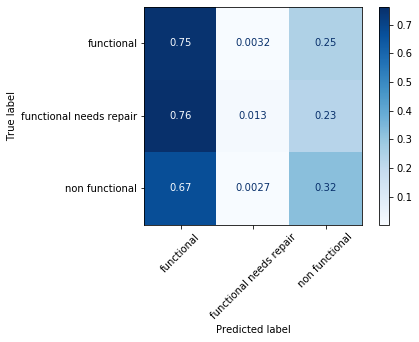

In [49]:
print('Classification Report: KNN with GridSearch')
print(classification_report(y_test, knn_grid.predict(X_test)))

plt.figure(figsize = (12, 10))
plot_confusion_matrix(knn_grid, X_test, y_test, cmap = 'Blues', normalize = 'true')
plt.xticks(rotation = 45)
plt.show()

In [50]:
knn2 = KNeighborsClassifier(n_neighbors = 4, weights = 'uniform')

In [51]:
knn2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [52]:
print(classification_report(y_test, knn2.predict(X_test)))

                         precision    recall  f1-score   support

             functional       0.56      0.75      0.64      6301
functional needs repair       0.11      0.03      0.05       791
         non functional       0.44      0.29      0.35      4426

               accuracy                           0.52     11518
              macro avg       0.37      0.36      0.35     11518
           weighted avg       0.48      0.52      0.49     11518



In [53]:
# XGBooster
 


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 42)

In [55]:
print('train: ', X_train.shape, y_train.shape)
print('test: ', X_test.shape, y_train.shape)

train:  (46070, 98) (46070,)
test:  (11518, 98) (46070,)


In [56]:
clf = XGBClassifier()

clf.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [57]:
training_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)

training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('training accuracy: {:.4}%'.format(training_accuracy *100))
print('validate accuracy: {:.4}%'.format(test_accuracy * 100))

training accuracy: 74.15%
validate accuracy: 73.93%


In [58]:
print(classification_report(y_test, clf.predict(X_test)))

                         precision    recall  f1-score   support

             functional       0.70      0.93      0.80      6301
functional needs repair       0.63      0.08      0.15       791
         non functional       0.84      0.58      0.69      4426

               accuracy                           0.74     11518
              macro avg       0.72      0.53      0.55     11518
           weighted avg       0.75      0.74      0.71     11518



In [59]:
#   Random Forest
#
#

In [60]:
rfc = RandomForestClassifier(max_depth = 8)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=8)

In [61]:
yhat = rfc.predict(X_test)

In [62]:
print('train accuracy:', accuracy_score(y_train, rfc.predict(X_train)) * 100) 
print('test accuracy:', accuracy_score(y_test, yhat) * 100) 

train accuracy: 74.05035815064032
test accuracy: 73.45893384268102


In [65]:
print(classification_report(y_test, rfc.predict(X_test)))

                         precision    recall  f1-score   support

             functional       0.69      0.96      0.80      6301
functional needs repair       0.76      0.04      0.08       791
         non functional       0.88      0.54      0.67      4426

               accuracy                           0.73     11518
              macro avg       0.78      0.51      0.52     11518
           weighted avg       0.77      0.73      0.70     11518



In [63]:
# random forest with grid search

In [64]:
rfc_params = {
    'n_estimators': [6, 8, 10, 12],
    'criterion': ['gini', 'entropy'],
    'max_depth': [4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8]
}


grid_rfc = GridSearchCV(RandomForestClassifier(), rfc_params,
                        cv = 5, scoring = 'accuracy').fit(X_train, y_train)

In [66]:
grid_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_split': 2,
 'n_estimators': 12}

In [67]:
yhatgs = grid_rfc.predict(X_test)

In [68]:
print('train accuracy:', accuracy_score(y_train, grid_rfc.predict(X_train)))
print('test accuracy:', accuracy_score(y_test, yhatgs))

train accuracy: 0.7562839157803343
test accuracy: 0.7463101232852926


                         precision    recall  f1-score   support

             functional       0.71      0.94      0.81      6301
functional needs repair       0.67      0.09      0.15       791
         non functional       0.86      0.58      0.70      4426

               accuracy                           0.75     11518
              macro avg       0.74      0.54      0.55     11518
           weighted avg       0.76      0.75      0.72     11518



<Figure size 864x720 with 0 Axes>

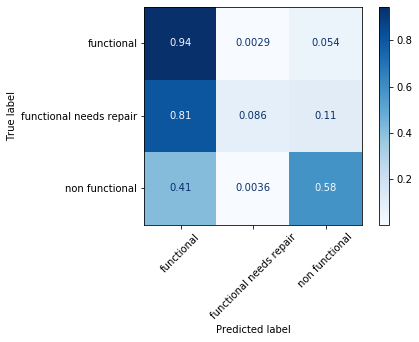

In [70]:
print(classification_report(y_test, yhatgs))

# confusion matrix
plt.figure(figsize = (12, 10))
plot_confusion_matrix(grid_rfc, X_test, y_test, cmap = 'Blues', normalize = 'true')
plt.xticks(rotation = 45)
plt.show()